<H1>Linear Regression</H1>

<h3>linear regression is a supervised learning algorithm which is used to predict a continuous outcome<h3>

# import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# import dataset

In [2]:
df=pd.read_csv("Advertising.csv")

# top 5 elements

In [3]:
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

# data cleaning 

In [4]:
df.drop(columns="Unnamed: 0",inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
df.describe().T


count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

# visualizing the data 

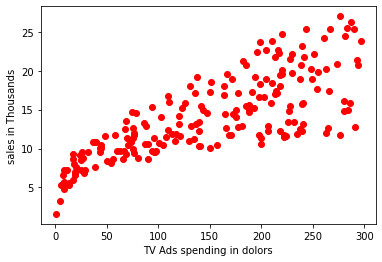

In [8]:
plt.scatter(x=df['TV'],y=df['Sales'],color='red')
plt.xlabel("TV Ads spending in dolors")
plt.ylabel("sales in Thousands")
plt.show()

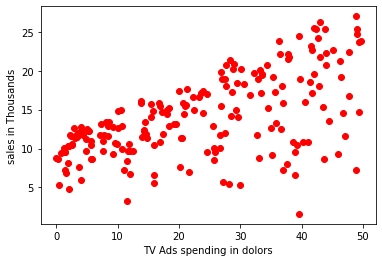

In [9]:
plt.scatter(x=df['Radio'],y=df['Sales'],color='red')
plt.xlabel("TV Ads spending in dolors")
plt.ylabel("sales in Thousands")
plt.show()

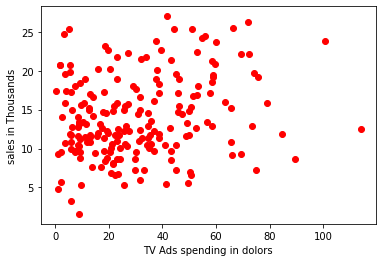

In [10]:
plt.scatter(x=df['Newspaper'],y=df['Sales'],color='red')
plt.xlabel("TV Ads spending in dolors")
plt.ylabel("sales in Thousands")
plt.show()

# as checking corelation

In [11]:
df.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

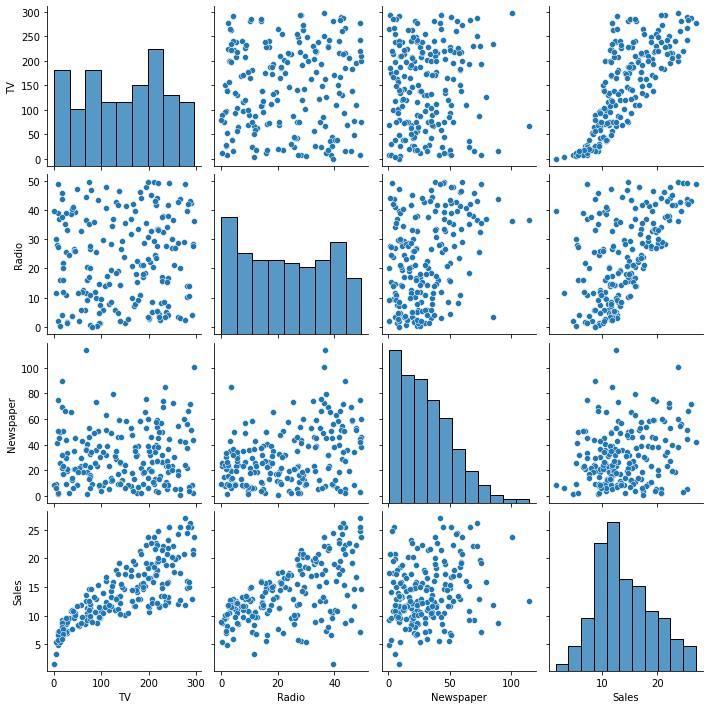

In [12]:
sns.pairplot(df)

# STEP 4 extract the feature vector and target column

In [13]:
x=df.drop(columns="Sales") #feature vector(more then one feature)
y=df["Sales"] #target

In [14]:
x.head()

TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

In [15]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# alternating method

In [16]:
x_alt=df.iloc[:,:-1] #df.iloc[:,:3]
y_alt=df.iloc[:,-1]

In [17]:
x_alt.head()

TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

In [18]:
x_alt[:3] #other way

TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3

# step 5 :split data into train set and  test set

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2) #random_state means random data is used in trainig we dont use it that's why we use it .

In [20]:
len(x_train) #length of train

160

In [21]:
len(x_test) #length of test

40

In [22]:
x.shape

(200, 3)

In [23]:
len(x)

200

# step 6 :building model

In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor



LinearRegression()

# step 7 trianing the model fit method is used

In [25]:
regressor.fit(x_train,y_train)
regressor


LinearRegression()

# step 8: making predictions

In [26]:
y_predictied=regressor.predict(x_test)
y_predictied[:5]

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326])

In [27]:
regressor.predict([[250,40,75]])

C:\Users\kamran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.93633245])

# comparing actual output with predicted output

In [28]:
actual_predicted=pd.DataFrame({"actual outcome":y_test,"predicted outcome":y_predictied})
actual_predicted[:5]

actual outcome  predicted outcome
95             16.9          16.408024
15             22.4          20.889882
30             21.4          21.553843
158             7.3          10.608503
128            24.7          22.112373

# accurancy 


In [29]:
regressor.score(x_test,y_test)

0.899438024100912